# Mashable Project 

URL : https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

### Attribute Information: 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

###### Citation Request Below: 

 Please include this citation if you plan to use this database: 
 
    K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision
    Support System for Predicting the Popularity of Online News. Proceedings
    of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,
    September, Coimbra, Portugal.
    
a link that could be of interest; http://www-scf.usc.edu/~jiayingg/0%20Characterize%20Data-results.html



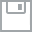
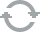
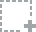
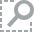
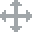
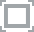
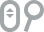
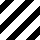
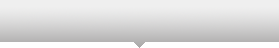
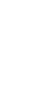
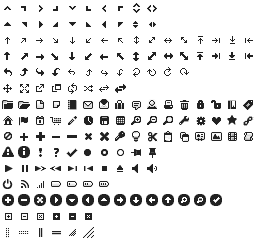
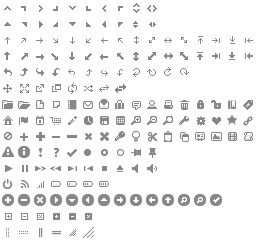
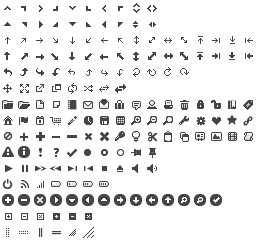
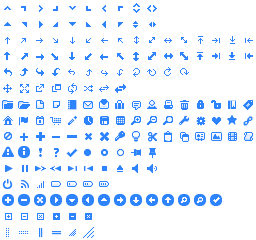
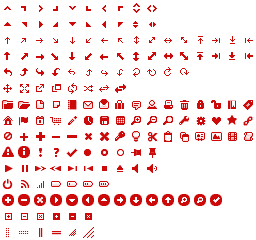
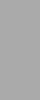
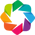
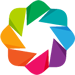

In [401]:
import numpy as np
import pandas as pd
import math

# allow plots to appear in the noteboo

# create a custom colormap
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d
from bokeh.io import hplot, output_file

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.decomposition import PCA #SVD

output_notebook()
%matplotlib inline

In [441]:

mash = pd.read_csv("OnlineNewsPopularity.csv") #remember that read_csv auto places read data into a DF

#noticed that the headers all had a whitespace in it, so needed to remove it.
mash.columns = mash.columns.str.strip()

mash['url_id'] = mash.index

#let's move the url_id column from the end to the top.

cols = mash.columns.tolist()
cols

cols = cols[-1:] + cols[:-1]
cols

mash = mash[cols]

## Exp 1

Let's cut the data down to only a couple of columns, and analyze based off of the URL

* n_tokens_title : 
* n_tokens_content :  
* n_unique_tokens : 
* num_hrefs

In [113]:
exp1_col = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs']
            #removed url_id

mash_1 = mash[exp1_col]

In [114]:
data_channel = []

#1 : lifestyle
#2 : entertainment
#3 : business
#4 : social media
#5 : tech
#6 : world
#0 : none of the above

#each article has multiple values

for value in range(len(mash)):
    
    if(mash.data_channel_is_lifestyle[value] == 1):
        data_channel.append(1)
    
    elif(mash.data_channel_is_entertainment[value] == 1 ):
        data_channel.append(2)
        
    elif(mash.data_channel_is_bus[value] == 1):
        data_channel.append(3)
        
    elif(mash.data_channel_is_socmed[value] == 1):
        data_channel.append(4)
        
    elif(mash.data_channel_is_tech[value] == 1):
        data_channel.append(5)
        
    elif(mash.data_channel_is_world[value] == 1):
        data_channel.append(6)
        
    else:
        data_channel.append(0)

len(data_channel)

39644

In [115]:
#CAN IGNORE. BELOW CODE was used to test to see if there any other variations of 0, 1 in the 'data_channels'

test = pd.DataFrame(mash['data_channel_is_world'])
x = (test==1).sum() #2099 numbers of 1
y = (test==0).sum() #37545

print x
print y
print (x + y)

data_channel_is_world    8427
dtype: int64
data_channel_is_world    31217
dtype: int64
data_channel_is_world    39644
dtype: int64


In [116]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(mash_1, data_channel) 

score_knn = cross_validation.cross_val_score(knn, mash_1, data_channel)
score_knn.mean()

#score of 0.027

0.26980260153124963

In [117]:
#Now let's do a logistic regression based off of these 3 features to see if they even have any significance

model_LR = LogisticRegression


/Users/brianzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


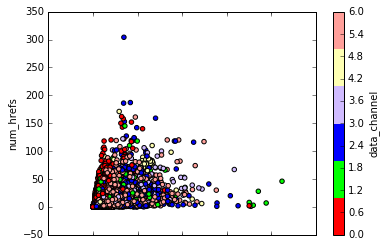

In [118]:
#graphing num_hrefs vs n_tokens_title

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#D0BBFF', '#feffb3', '#FF9F9A'])

mash_1['data_channel'] = data_channel

mash_1.plot(kind='scatter', x='n_tokens_content', y='num_hrefs', c='data_channel', colormap = cmap_bold)
#mash_1.plot()
#['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs']

#.plot is part of dataframe

In [157]:
#In case we need to reapply our data

mash = pd.read_csv("OnlineNewsPopularity.csv") #remember that read_csv auto places read data into a DF

#noticed that the headers all had a whitespace in it, so needed to remove it.
mash.columns = mash.columns.str.strip()

mash['url_id'] = mash.index

#let's move the url_id column from the end to the top.

cols = mash.columns.tolist()
cols

cols = cols[-1:] + cols[:-1]
cols

mash = mash[cols]

# Experiment 2 + 3

Remove all of the binary classification labels, and then use logistic regression to identify what features are most important for which days of the week as well as what type of data channels

In [154]:
columns_remove_channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
                  'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

columns_remove_days = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 
                 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

#interesting to note about the 'is_weekend' column

In [352]:
#Build a DataFrame (mash_2 that will )

count = 1

#Definition of Mash_2

for value in columns_remove_days:
    if(count == 1):
        mash_2 = mash.drop([value], axis = 1)
        mash_2 = mash_2.drop(['url'], axis = 1)
        mash_2 = mash_2.drop(['url_id'], axis = 1)
        
        count = 2
    else:
        mash_2 = mash_2.drop([value], axis = 1)

for value in columns_remove_channels:
    mash_2 = mash_2.drop([value], axis = 1)
    

mash_2['type_data_channel'] = data_channel #categorized what type of article it is

exp2_cross_results = []

In [350]:
plots = []

count = 1
coeffs_list = []

for value2 in columns_remove_days:

    target_2 = mash[value2] #Let's see what features are selective for releasing on Monday.

    std_scalar = StandardScaler()
    features_2 = std_scalar.fit_transform(mash_2)

##

    X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.2, random_state=1)

    model_lgr = LogisticRegression()
    model_lgr.fit(X_train,y_train)
    
    
##

    col_1_name = 'features for %s' % value2

    coefficient_lgr = model_lgr.coef_.ravel() #coefficients
    coeffs = pd.DataFrame(zip(mash_2.columns,model_lgr.coef_.ravel()), columns = [col_1_name, 'coeff'])
    coeffs.head()

    coeffs['abs']=np.absolute(coeffs.coeff.values) #putting all values to be positive
    coeffs_sort = coeffs.sort('abs', ascending = False).head(5) #we can see the top 5 most impactful features 
    coeffs_list.append(coeffs_sort)
    
    #Below is code related to graphing and plotting. 
    
    x = np.arange(len(mash_2.columns))

    feature_names = mash_2.columns
    
    title_name = "Model Coefficients for %s" % value2

    p = figure(title= title_name, tools = '', width = 250, height = 250)
    p.logo = None
    p.toolbar_location = None

    for val in x:
        p.quad(top = coefficient_lgr[val], bottom=0, left=val+0.2,
               right=val+0.8,legend=None)
    
    p.y_range = Range1d(min(coefficient_lgr)-0.1, max(coefficient_lgr)+1.5)

    plots.append(p)


/Users/brianzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [348]:
coeffs_list[6]

features for is_weekend     coeff       abs
3              n_unique_tokens -0.459265  0.459265
33         rate_positive_words -0.416687  0.416687
5     n_non_stop_unique_tokens -0.413404  0.413404
23  self_reference_avg_sharess -0.273273  0.273273
17                  kw_avg_max -0.253212  0.253212

With Logistic Regression:

# wouldn't you only look at articles that have a target of 1 then? 
# Need more information behind logistic regression

### Important Features that show an article is likely Published on:

    Monday: 
        * n_stop_unique_tokens [-0.193719]
        * kw_avg_avg [-0.1706]
        * self_reference_avg_sharess [0.164]
        
    Tuesday:
        * n_unique_tokens [0.339244]
        * n_non_stop_words [0.2865]
        * n_non_stop_unique_tokens [-0.23374]
        
    Wednesday:
        * n_unique_tokens [-0.563817]
        * n_non_stop_words [-0.142831]
        
    Thursday:
        * n_non_stop_unique_tokens [-0.20612]
        * n_unique_tokens [-0.1563]
        
    Friday:
        * n_non_stop_words [-0.873185]
        * n_non_stop_unique_tokens [0.825904]
        
    Saturday:
        * n_unique_tokens [-1.04089]
        * n_non_stop_unique_tokens [-0.576278]
        * kw_avg_avg [0.273542]
        
    Sunday:
        * rate_positive_words [-0.5719]
        * average_token_length [0.355682]
        * global_rate_positive_words [0.29171]
        
    IS_Weekend:
        * n_unique_tokens [-0.459265]
        * rate_positive_words [-0.416687]
        * n_non_stop)unique_tokens [-0.413404]

In [302]:
for value in plots:
    show(value)

In [373]:
#EXACT COPY OF MASH_2 ANALYSIS, BUT NOW FOR THE TYPE OF ARTICLES

plots = []

count = 1
coeffs_list = []

mash_2 = mash_2.drop(['type_data_channel'], axis = 1) #remove

for value3 in columns_remove_channels:

    target_3 = mash[value3] #Let's see what features are selective for releasing on Monday.

    std_scalar = StandardScaler()
    features_2 = std_scalar.fit_transform(mash_2) #still features_2/mash_2 as the dataframe shouldn't change

##

    X_train, X_test, y_train, y_test = train_test_split(features_2, target_3, test_size=0.2, random_state=1)

    model_lgr = LogisticRegression()
    model_lgr.fit(X_train,y_train)
    
    
##

    col_1_name = 'features for %s' % value3

    coefficient_lgr = model_lgr.coef_.ravel() #coefficients
    coeffs = pd.DataFrame(zip(mash_2.columns,model_lgr.coef_.ravel()), columns = [col_1_name, 'coeff'])
    coeffs.head()

    coeffs['abs']=np.absolute(coeffs.coeff.values) #putting all values to be positive
    coeffs_sort = coeffs.sort('abs', ascending = False).head(10) #changed to top 10 due to larger correlation
    coeffs_list.append(coeffs_sort)
    
    #Below is code related to graphing and plotting. 
    
    x = np.arange(len(mash_2.columns))

    feature_names = mash_2.columns
    
    title_name = "Model Coefficients for %s" % value3

    #p = figure(title= title_name, tools = '', width = 250, height = 250)
    p = figure(title= title_name, tools = '')
    p.logo = None
    p.toolbar_location = None

    for val in x:
        p.quad(top = coefficient_lgr[val], bottom=0, left=val+0.2,
               right=val+0.8)
    
    p.y_range = Range1d(min(coefficient_lgr)-0.1, max(coefficient_lgr)+1.5)

    plots.append(p)


/Users/brianzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [374]:
for value in plots:
    show(value)

In [392]:
coeffs_list[5]

#iterated over to build the markdown below detailing the labels with the highest importance

features for data_channel_is_world     coeff       abs
26                             LDA_02  2.196563  2.196563
5            n_non_stop_unique_tokens  1.804749  1.804749
4                    n_non_stop_words -1.251549  1.251549
20                         kw_avg_avg -0.866756  0.866756
25                             LDA_01 -0.823497  0.823497
10               average_token_length  0.809877  0.809877
24                             LDA_00 -0.771737  0.771737
19                         kw_max_avg  0.720651  0.720651
33                rate_positive_words -0.701652  0.701652
17                         kw_avg_max -0.671448  0.671448

With Logistic Regression:

### Important Features that show an article is likely what data channel:

    Lifestyle: (note that there are a lot of other labels that were close to -1)
        * n_non_stop_unique_tokens [2.4023]
        * kw_avg_avg [1.7041]
        * kw_avg_max [-1.5384]
        * n_non_stop_words [-1.496907]
        
    Entertainment: (note that there are a lot of other labels that were close to -1)
        * kw_avg_avg [-1.6465]
        * LDA_01 [1.5882]
        * LDA_03 [1.3061]
        * LDA_04 [-1.185667]
        * kw_avg_max: [-1.0273]
        
    Bus:
        * kw_avg_max 2.180455]
        * LDA_00 [1.9769]kw_avg_avg; [-1.8642]
        * kw_avg_avg [-1.8642]
        
    Socmed:
        * kw_avg_max [-1.6420]
        * kw_avg_avg [1.5282]
        * kw_max_avg [-1.4357]
        * n_non_stop_unique_tokens [-1.2106]
        
    Tech:
        * LDA_04 [1.7151]
        * n_non_stop_unique_tokens [-1.0203]
        * kw_avg_avg [-0.8940]
        
    World:
        * LDA_02 [2.1965]
        * n_non_stop_unique_tokens [1.8047]
        *kw_avg_avg [-0.86675]
        

## Apply a SVD for Dimensionality Reduction of the 'mash_2' labels
* PCA

In [403]:
#PCA
pca = PCA()
mash_pca = pca.fit(mash_2).transform(mash_2) #data is fit

In [404]:
mash_2.shape
mash_pca.shape 

(39644, 46)

In [407]:
#Below shows how much variance occurs for the first two principal components


# Percentage of variance explained (first two components):
print "First component: " + str(pca.explained_variance_ratio_[0]) #explained_variance_ratio
print "Second component: " + str(pca.explained_variance_ratio_[1]) #explained_variance_ratio 

print "Total Sum of Variance Ratios: " + str(pca.explained_variance_ratio_.sum())
#explained_variance_ratio means: amount of variance at each component explained


First component: 0.761361257815
Second component: 0.163519749032
Total Sum of Variance Ratios: 1.0


In [410]:
p = figure(title="PCA in Mashable Dataset",tools='')

x_values =  mash_pca[:,0]
y_values =  mash_pca[:,1]
p.circle(x = x_values,y=y_values,size = 5)

show(p)

In [411]:
x_2 = range(len(mash_2))
y_2 = pca.explained_variance_ratio_

p = figure(title = 'Scree Plot', tools ='')
p.line(x_2, y_2)
show(p)

ERROR:/Users/brianzhou/anaconda/lib/python2.7/site-packages/bokeh/validation/check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: a67c1b7c-cfaf-4a9a-ae7c-d2724ce39433


In [435]:
mash.columns

mash.timedelta.value_counts()
#max(mash.timedelta) #max is 731.0
#min(mash.timedelta) #min is 8.0

91     104
72     102
84     101
59      99
29      99
210     97
182     96
37      95
28      95
127     94
161     94
52      94
77      93
35      93
23      93
79      93
100     92
36      92
92      92
66      92
71      91
169     90
121     90
49      90
126     90
135     90
50      89
64      89
70      89
260     89
      ... 
243     19
432     19
522     19
264     19
145     19
481     19
543     19
495     19
557     19
677     19
621     19
383     19
494     18
691     18
508     18
585     18
404     18
299     18
684     18
369     17
571     17
705     17
719     17
291     16
635     16
375     15
376     15
656     15
730     12
8        8
Name: timedelta, dtype: int64